# Pràctica 2
### Autors:
<ul>
    <li>Gerard Medina</li>
    <li>Xisco Cerdó</li>
</ul>

## Imports

In [1]:
import os
import shutil
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim
from tqdm import tqdm
from torchvision import transforms, datasets
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Classificar i transformar el Dataset

In [2]:
# Set the path to the dataset directory
old_dataset = "datasets/old_pets/images/"

# Transformacions de les imatges
transform1 = transforms.Compose([
    transforms.Resize(225),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4866, 0.4484, 0.3962], std=[0.2270, 0.2244, 0.2252])
])

In [32]:
# Set the path to the dataset directory
old_dataset = "datasets/old_pets/images/"

# Transformacions de les imatges
transform2 = transforms.Compose([
    transforms.Resize(150),
    transforms.CenterCrop(150),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4866, 0.4484, 0.3962], std=[0.2270, 0.2244, 0.2252])
])

### Separar sense races

In [9]:
carpeta_moixos = "datasets/CNN/sense_races/moix/"
carpeta_cans = "datasets/CNN/sense_races/ca/"

# Create the output directories if they don't exist
os.makedirs(carpeta_moixos, exist_ok=True)
os.makedirs(carpeta_cans, exist_ok=True)

# Get the list of all files in the dataset directory
all_files = os.listdir(old_dataset)

# Loop through each file and copy it to the appropriate directory
for filename in all_files:
    full_path = os.path.join(old_dataset, filename)
    try:
        transform1(Image.open(full_path))
        if filename[0].islower():
            shutil.copy(full_path, os.path.join(carpeta_cans, filename))
        elif filename[0].isupper():
            shutil.copy(full_path, os.path.join(carpeta_moixos, filename))
    except Exception as e:
        print(f"Error transformació arxiu '{filename}': {str(e)}")

Error transformació arxiu 'Abyssinian_100.mat': cannot identify image file 'datasets/old_pets/images/Abyssinian_100.mat'
Error transformació arxiu 'Abyssinian_101.mat': cannot identify image file 'datasets/old_pets/images/Abyssinian_101.mat'
Error transformació arxiu 'Abyssinian_102.mat': cannot identify image file 'datasets/old_pets/images/Abyssinian_102.mat'
Error transformació arxiu 'Abyssinian_34.jpg': output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error transformació arxiu 'Abyssinian_5.jpg': The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0
Error transformació arxiu 'Egyptian_Mau_129.jpg': output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error transformació arxiu 'Egyptian_Mau_139.jpg': output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error transformació arxiu 'Egyptian_Mau_14.jpg': The size of tensor a (4) must match the size of tensor b (3) at n

### Separar amb races

In [12]:
carpeta_races = "datasets/CNN/amb_races/"
os.makedirs(carpeta_races, exist_ok=True)

# Create a dictionary to store the destination folders for each category
classes = {}

# Iterate through the files in the folder
for filename in os.listdir(old_dataset):
    # Extract the category name
    category_name = filename.split('_')[:-1]  # Remove the last element (_x)
    category_name = '_'.join(category_name)
    
    # Check if the category folder exists, create if not
    if category_name not in classes:
        classes[category_name] = os.path.join(carpeta_races, category_name)
        os.makedirs(classes[category_name], exist_ok=True)

    # Copy the file to the appropriate category folder
    src_path = os.path.join(old_dataset, filename)
    try:
        transform1(Image.open(src_path))
        dest_path = os.path.join(classes[category_name], filename)
        shutil.copy(src_path, dest_path)
    except Exception as e:
        print(f"Error transformació arxiu '{filename}': {str(e)}")

Error transformació arxiu 'Abyssinian_100.mat': cannot identify image file 'datasets/old_pets/images/Abyssinian_100.mat'
Error transformació arxiu 'Abyssinian_101.mat': cannot identify image file 'datasets/old_pets/images/Abyssinian_101.mat'
Error transformació arxiu 'Abyssinian_102.mat': cannot identify image file 'datasets/old_pets/images/Abyssinian_102.mat'
Error transformació arxiu 'Abyssinian_34.jpg': output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error transformació arxiu 'Abyssinian_5.jpg': The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0
Error transformació arxiu 'Egyptian_Mau_129.jpg': output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error transformació arxiu 'Egyptian_Mau_139.jpg': output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]
Error transformació arxiu 'Egyptian_Mau_14.jpg': The size of tensor a (4) must match the size of tensor b (3) at n

## Carregar el Dataset

In [3]:
#dataset_path = "datasets/CNN/sense_races"
dataset_path = "datasets/CNN/sense_races"

# Load the dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform1)

# Define the data loader
#batch_size = 32
#data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
# Nombre d'imatges en el dataset
print("Number of images in dataset: ", len(dataset))

Number of images in dataset:  7378


## Mostrar exemples nou Dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

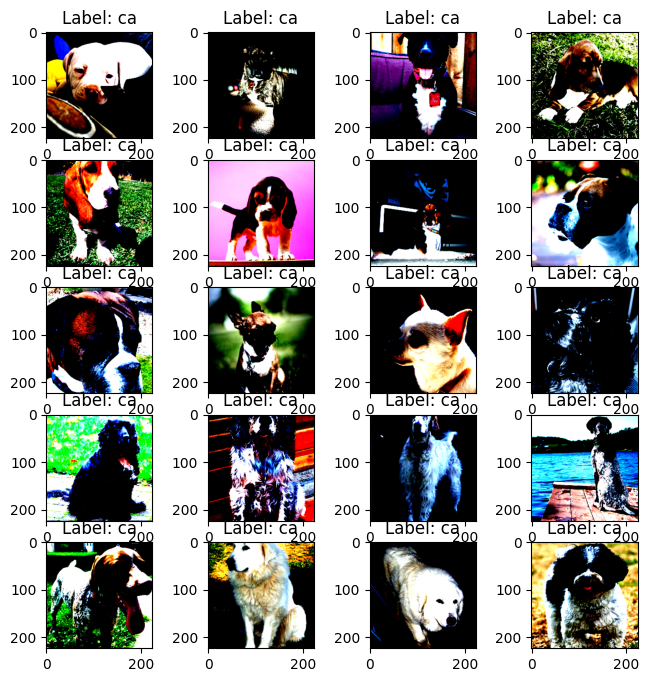

In [5]:
# Show some sample images
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img_idx = i*100
    img, label = dataset[img_idx]
    fig.add_subplot(rows, columns, i)
    plt.title("Label: "+dataset.classes[label])
    plt.imshow(img.permute(1, 2, 0))
plt.show()

# Estructura del model


In [6]:
class PetCNN1(nn.Module):
    def __init__(self, num_classes=37):
        super(PetCNN1, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(28*28*128, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        y = self.conv1(x)
        x = self.relu(y)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 28*28*128)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x, y

In [50]:
class PetCNN2(torch.nn.Module):
    def __init__(self):
        super(PetCNN2, self).__init__()
        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv_2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = nn.Linear(16 * 64 * 64, 64)
        self.linear_2 = nn.Linear(64, 37)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        y = self.conv_1(x)
        x = self.max_pool2d(y)
        x = self.conv_2(x)
        x = self.max_pool2d(x)
        x = torch.flatten(x, 1)
        x = self.linear_1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.linear_2(x)
        return x, y

In [ ]:
class PetCNN3(nn.Module):
    def __init__(self, num_classes=37):
        super(PetCNN3, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(82944, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        y = self.conv1(x)
        x = self.relu(y)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.pool(x)

        x = self.conv5(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.relu(x)
        x = self.pool(x)

        x = self.flat(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        
        return x, y

## Instanciar el model

### Test/train

In [14]:
train_size = round(int(len(dataset)*.75))
test_size = len(dataset)-train_size
train_set, val_set = torch.utils.data.random_split(dataset, [train_size,test_size])

### Hardware i paràmetres

In [8]:
# Hardware
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Hardware: {device}')
model = PetCNN1().to(device)

# Paràmetres
num_params = sum(p.numel() for p in model.parameters())
print(f"Nombre de paràmetres: {num_params}")

Hardware: cuda
Nombre de paràmetres: 51492965


### Hiperparàmetres

In [15]:
batch_size = 64
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

### Data loaders

In [16]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False)

## Funcions entrenar/validar

In [17]:
def train(model, dataloader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    
    for inputs, labels in tqdm(dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs, _ = model(inputs)
        loss = criterion(outputs, labels)
        
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        
        loss.backward()
        optimizer.step()
    
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)
    
    return epoch_loss, epoch_acc

def validate(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs, _= model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_acc = running_corrects.double() / len(dataloader.dataset)
    
    return epoch_loss, epoch_acc

## Entrenament

In [18]:
train_losses = []
train_accs = []
valid_losses = []
valid_accs = []

best_valid_acc = 0.0

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer)
    valid_loss, valid_acc = validate(model, val_loader, criterion)
    
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}")
          
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_losses': train_losses,
            'train_accs': train_accs,
            'valid_losses': valid_losses,
            'valid_accs': valid_accs
        }
        torch.save(checkpoint, 'pet_checkpoint.pt')

100%|██████████| 29/29 [00:16<00:00,  1.77it/s]


Epoch 1/10, Train Loss: 0.2130, Train Acc: 0.9411, Valid Loss: 0.1509, Valid Acc: 0.9556


100%|██████████| 29/29 [00:16<00:00,  1.81it/s]


Epoch 2/10, Train Loss: 0.0884, Train Acc: 0.9720, Valid Loss: 0.1565, Valid Acc: 0.9566


100%|██████████| 29/29 [00:15<00:00,  1.82it/s]


Epoch 3/10, Train Loss: 0.0362, Train Acc: 0.9902, Valid Loss: 0.1964, Valid Acc: 0.9572


100%|██████████| 29/29 [00:16<00:00,  1.77it/s]


Epoch 4/10, Train Loss: 0.0185, Train Acc: 0.9948, Valid Loss: 0.2309, Valid Acc: 0.9545


100%|██████████| 29/29 [00:16<00:00,  1.81it/s]


Epoch 5/10, Train Loss: 0.0164, Train Acc: 0.9958, Valid Loss: 0.2521, Valid Acc: 0.9518


100%|██████████| 29/29 [00:16<00:00,  1.77it/s]


Epoch 6/10, Train Loss: 0.0097, Train Acc: 0.9980, Valid Loss: 0.2510, Valid Acc: 0.9528


100%|██████████| 29/29 [00:16<00:00,  1.80it/s]


Epoch 7/10, Train Loss: 0.0052, Train Acc: 0.9991, Valid Loss: 0.2989, Valid Acc: 0.9534


100%|██████████| 29/29 [00:16<00:00,  1.81it/s]


Epoch 8/10, Train Loss: 0.0033, Train Acc: 0.9991, Valid Loss: 0.3459, Valid Acc: 0.9496


100%|██████████| 29/29 [00:16<00:00,  1.79it/s]


Epoch 9/10, Train Loss: 0.0050, Train Acc: 0.9986, Valid Loss: 0.4235, Valid Acc: 0.9491


100%|██████████| 29/29 [00:16<00:00,  1.79it/s]

Epoch 10/10, Train Loss: 0.0163, Train Acc: 0.9964, Valid Loss: 0.4448, Valid Acc: 0.9398


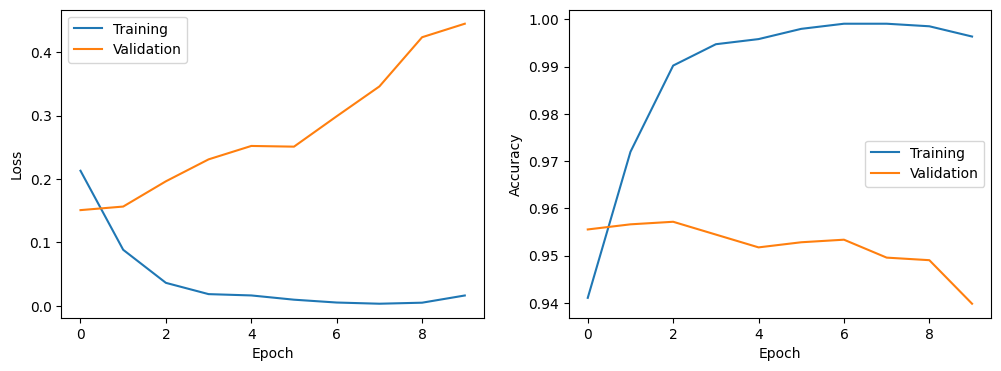

: 

In [19]:
# Tensors a CPU
train_accs_cpu = [acc.cpu().numpy() for acc in train_accs]
valid_accs_cpu = [acc.cpu().numpy() for acc in valid_accs]

# Mostrar entrenament vs validació
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training')
plt.plot(valid_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accs_cpu, label='Training')
plt.plot(valid_accs_cpu, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Mostrar la primera imatge del batch

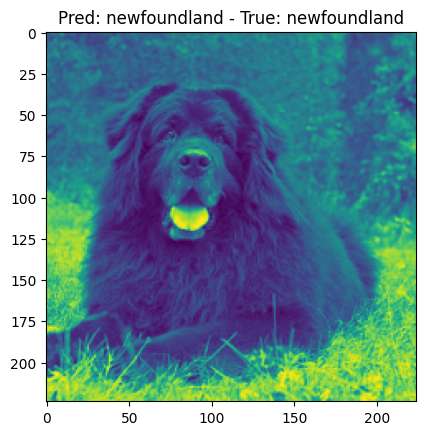

In [35]:
def generador(loader):
    for data, target in loader:
        data, target = data.to(device), target.to(device)
        yield data, target

gen = generador(val_loader)

data, true_labels = next(gen)

model.eval()

output, f1 = model(data)

labels = output.detach().cpu().numpy()
images = data.cpu().numpy()
labels = np.argmax(labels, axis=1)

plt.title(f'Pred: {dataset.classes[labels[0]]} - True: {dataset.classes[int(true_labels[0])]}')
plt.imshow(images[0,0,:,:])

## Mostrar la imatge a través dels filtres

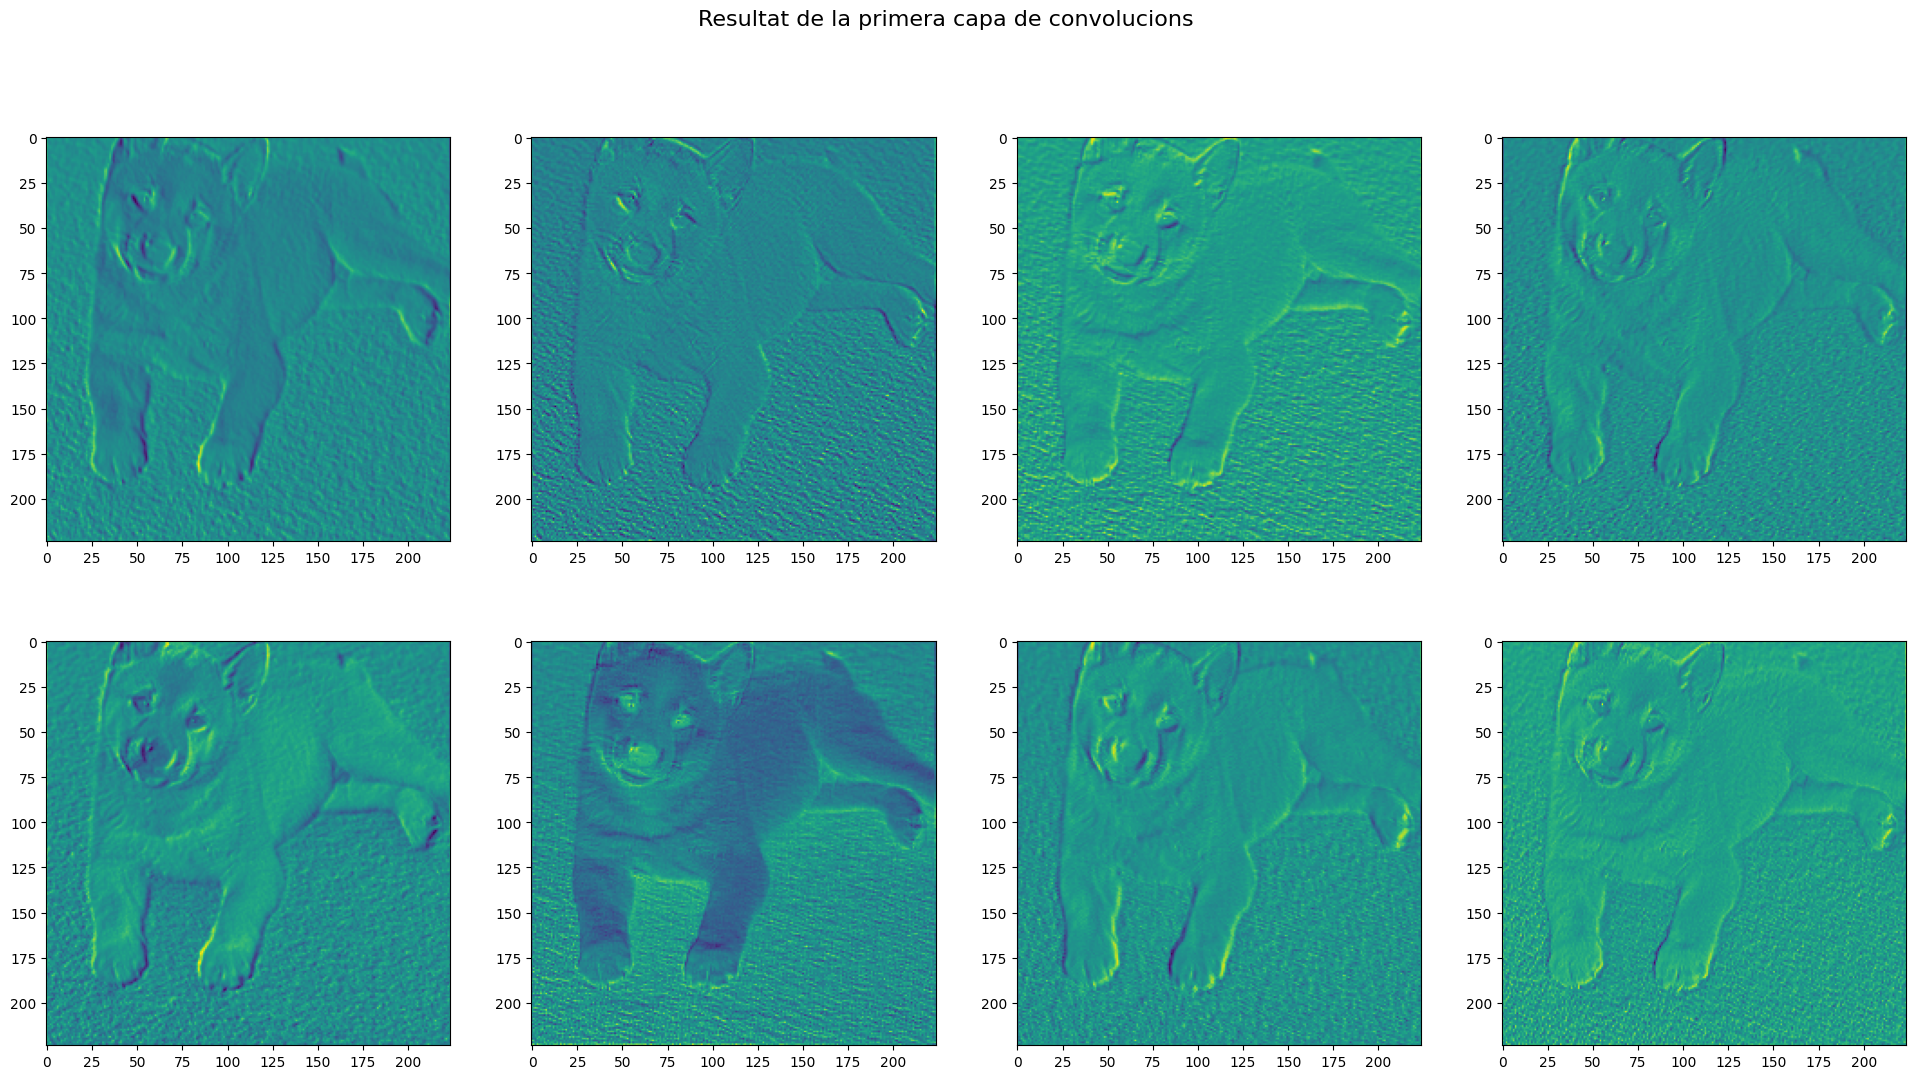

: 

In [36]:
rows= 2
cols = 4
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(24, 12))
fig.suptitle('Resultat de la primera capa de convolucions', fontsize=16)

for i in range(rows):
    for j in range(cols):        
        if img_count < rows*cols:
            axes[i, j].imshow(f1.detach().cpu().numpy()[1,img_count,:,:])
            
            img_count+=1
            
fig.set
plt.show()

## Assercions aleatòries

In [25]:
image_path = "images/german_shorthained.jpg"
image = Image.open(image_path)
input_image = transform1(image).unsqueeze(0).to(device)

with torch.no_grad():
    output, _ = model(input_image)

_, predicted_class = torch.max(output, 1)
print(f'És un: {dataset.classes[predicted_class.item()]}.')

És un: staffordshire_bull_terrier.


In [17]:
print(dataset.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


## Matriu de confusió

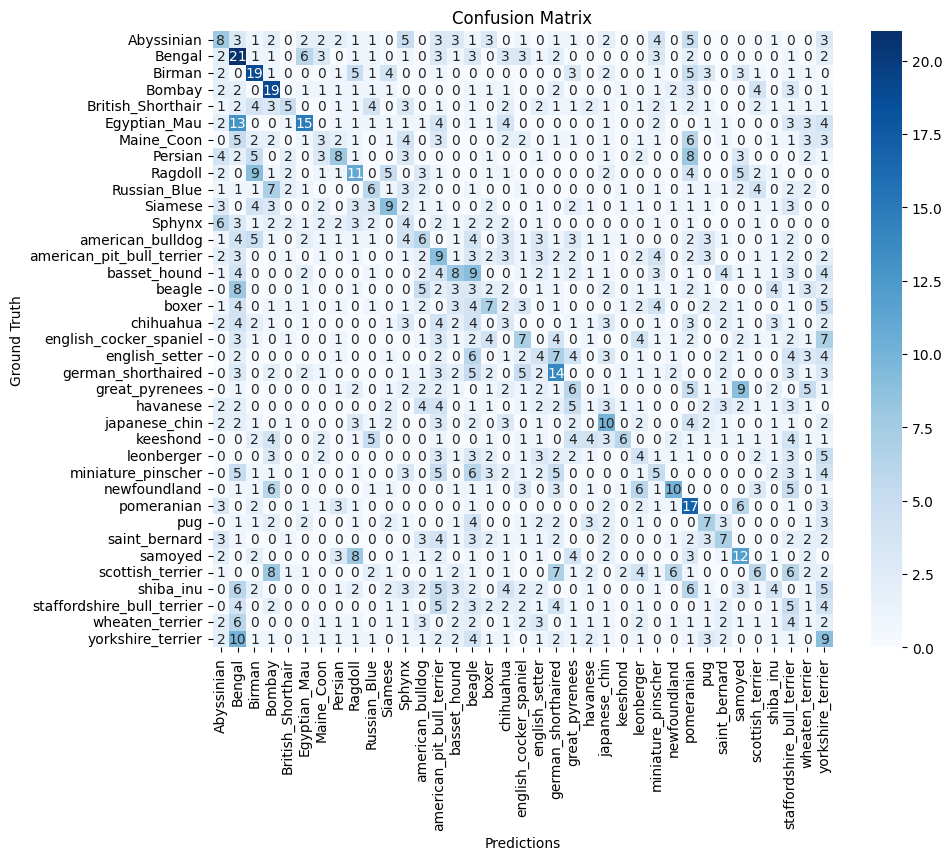

In [18]:
model.eval()

targets = []
predictions = []

with torch.no_grad():
    for data, target in val_loader:
        data, target = data.to(device), target.to(device)
        
        output, _ = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        targets.extend(target.tolist())
        predictions.extend(torch.flatten(pred.cpu()).tolist())
        
targets = np.asarray(targets)
predictions = np.asarray(predictions)

# Get the confusion matrix
cm = confusion_matrix(targets, predictions)

# Visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix')
plt.show()
